In [1]:
import requests
import json
import pandas as pd
from dotenv import load_dotenv
import os
import time
import numpy as np
import matplotlib.pyplot as plt
load_dotenv()

True

In [3]:
college_data21_22 = pd.read_csv("../Resources/data/MERGED2021_22_PP.csv", low_memory=False)
college21_22 = college_data21_22[["INSTNM","CITY","STABBR","COSTT4_A","TUITIONFEE_IN", "TUITIONFEE_OUT", "TUITFTE", "INEXPFTE"]] #only the columns I want
college21_22.head()

,INSTNM,CITY,STABBR,COSTT4_A,TUITIONFEE_IN,TUITIONFEE_OUT,TUITFTE,INEXPFTE
0,Alabama A & M University,Normal,AL,21924.0,10024.0,18634.0,9243.0,7699.0
1,University of Alabama at Birmingham,Birmingham,AL,26248.0,8568.0,20400.0,11678.0,14264.0
2,Amridge University,Montgomery,AL,NaN,NaN,NaN,14093.0,4381.0
3,University of Alabama in Huntsville,Huntsville,AL,24869.0,11488.0,23884.0,8246.0,8156.0
4,Alabama State University,Montgomery,AL,21938.0,11068.0,19396.0,8535.0,9459.0


In [4]:
college_data20_21 = pd.read_csv("../Resources/data/MERGED2020_21_PP.csv", low_memory=False)
college20_21 = college_data20_21[["INSTNM","CITY","STABBR","COSTT4_A","TUITIONFEE_IN", "TUITIONFEE_OUT", "TUITFTE", "INEXPFTE"]] #only the columns I want
college20_21.head()


,INSTNM,CITY,STABBR,COSTT4_A,TUITIONFEE_IN,TUITIONFEE_OUT,TUITFTE,INEXPFTE
0,Alabama A & M University,Normal,AL,23445.0,10024.0,18634.0,8101.0,4836.0
1,University of Alabama at Birmingham,Birmingham,AL,25542.0,8568.0,20400.0,11986.0,14691.0
2,Amridge University,Montgomery,AL,20100.0,6950.0,6950.0,13890.0,3664.0
3,University of Alabama in Huntsville,Huntsville,AL,24861.0,11338.0,23734.0,8279.0,8320.0
4,Alabama State University,Montgomery,AL,21892.0,11068.0,19396.0,9302.0,9579.0


In [5]:
cities=["Atlanta","Detroit", "Tampa", "Las Vegas", "Miami", "New Orleans", "Washington", "Baltimore", "Portland", "San Francisco"]
filtered_df = college20_21[college20_21.isin(cities).any(axis=1)]
filtered_df.head(40)

,INSTNM,CITY,STABBR,COSTT4_A,TUITIONFEE_IN,TUITIONFEE_OUT,TUITFTE,INEXPFTE
165,Academy of Art University,San Francisco,CA,43976.0,24664.0,24664.0,30341.0,15177.0
174,American Conservatory Theater,San Francisco,CA,NaN,30800.0,30800.0,27559.0,12551.0
189,California Institute of Integral Studies,San Francisco,CA,NaN,NaN,NaN,26946.0,11906.0
192,California College of the Arts,San Francisco,CA,68956.0,51137.0,51137.0,36646.0,20518.0
193,University of California-Hastings College of Law,San Francisco,CA,NaN,NaN,NaN,26549.0,29426.0
217,University of California-San Francisco,San Francisco,CA,NaN,NaN,NaN,19704.0,117956.0
249,City College of San Francisco,San Francisco,CA,14724.0,1165.0,8317.0,1371.0,7754.0
281,FIDM-Fashion Institute of Design & Merchandisi...,San Francisco,CA,49998.0,32645.0,32645.0,40876.0,7136.0
298,Golden Gate University,San Francisco,CA,NaN,NaN,NaN,20939.0,9071.0
422,San Francisco Art Institute,San Francisco,CA,70023.0,46064.0,46064.0,27699.0,14833.0


In [6]:
filtered_df.count()

INSTNM            253
CITY              253
STABBR            253
COSTT4_A          107
TUITIONFEE_IN     129
TUITIONFEE_OUT    129
TUITFTE           234
INEXPFTE          234
dtype: int64

In [7]:
house_values_df = pd.read_csv("house_values_zillow.csv")
hv_filtered = house_values_df[["RegionName", "StateName", "Metro","2012-01-31","2013-01-31","2014-01-31","2015-01-31","2016-01-31","2017-01-31","2018-01-31","2019-01-31","2020-01-31","2021-01-31","2022-01-31"]] #only the columns I want

states = ["GA","CA", "DC", "MI", "FL", "LA", "MD", "OR", "NV"]
metro = ["Las Vegas-Henderson-Paradise, NV", "San Francisco-Oakland-Berkeley, CA", "Miami-Fort Lauderdale-Pompano Beach, FL", "Portland-Vancouver-Hillsboro, OR-WA", "Washington-Arlington-Alexandria, DC-VA-MD-WV", "Detroit-Warren-Dearborn, MI", "Baltimore-Columbia-Towson, MD", "Atlanta-Sandy Springs-Alpharetta, GA", "Tampa-St. Petersburg-Clearwater, FL", "New Orleans-Metairie, LA"]
years = np.arange(2012,2022,1)
filtered_states_df = hv_filtered[hv_filtered.isin(states).any(axis=1)]
filtered_cities_df = filtered_states_df[filtered_states_df.isin(cities).any(axis=1)]
filtered_metro_df = filtered_cities_df[filtered_cities_df.isin(metro).any(axis=1)]
# filtered_hv_21_22_df.head(10)
filtered_metro_df['2012-01-31'] = filtered_metro_df['2012-01-31'].fillna(0)
filtered_metro_df['2013-01-31'] = filtered_metro_df['2013-01-31'].fillna(0)
filtered_metro_df['2014-01-31'] = filtered_metro_df['2014-01-31'].fillna(0)
filtered_metro_df['2015-01-31'] = filtered_metro_df['2015-01-31'].fillna(0)
filtered_metro_df['2016-01-31'] = filtered_metro_df['2016-01-31'].fillna(0)
filtered_metro_df['2017-01-31'] = filtered_metro_df['2017-01-31'].fillna(0)
filtered_metro_df['2018-01-31'] = filtered_metro_df['2018-01-31'].fillna(0)
filtered_metro_df['2019-01-31'] = filtered_metro_df['2019-01-31'].fillna(0)
filtered_metro_df['2020-01-31'] = filtered_metro_df['2020-01-31'].fillna(0)
filtered_metro_df['2021-01-31'] = filtered_metro_df['2021-01-31'].fillna(0)
filtered_metro_df['2022-01-31'] = filtered_metro_df['2022-01-31'].fillna(0)
# filtered_hv_21_22_df.head(50)
filtered_metro_df['2012-01-31'] = round(filtered_metro_df['2012-01-31'], 2)
filtered_metro_df['2013-01-31'] = round(filtered_metro_df['2013-01-31'], 2)
filtered_metro_df['2014-01-31'] = round(filtered_metro_df['2014-01-31'], 2)
filtered_metro_df['2015-01-31'] = round(filtered_metro_df['2015-01-31'], 2)
filtered_metro_df['2016-01-31'] = round(filtered_metro_df['2016-01-31'], 2)
filtered_metro_df['2017-01-31'] = round(filtered_metro_df['2017-01-31'], 2)
filtered_metro_df['2018-01-31'] = round(filtered_metro_df['2018-01-31'], 2)
filtered_metro_df['2019-01-31'] = round(filtered_metro_df['2019-01-31'], 2)
filtered_metro_df['2020-01-31'] = round(filtered_metro_df['2020-01-31'], 2)
filtered_metro_df['2021-01-31'] = round(filtered_metro_df['2021-01-31'], 2)
filtered_metro_df['2022-01-31'] = round(filtered_metro_df['2022-01-31'], 2)
filtered_metro_df = filtered_metro_df.rename(columns={"RegionName":"Year"})
for i in range(2012,2023):
    filtered_metro_df = filtered_metro_df.rename(columns={f"{i}-01-31":f"{i}"})
real_estate_prices = filtered_metro_df.set_index("Year")
real_estate_prices.head(20)



C:\Users\matth\AppData\Local\Temp\ipykernel_23732\50528981.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_metro_df['2012-01-31'] = filtered_metro_df['2012-01-31'].fillna(0)
C:\Users\matth\AppData\Local\Temp\ipykernel_23732\50528981.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_metro_df['2013-01-31'] = filtered_metro_df['2013-01-31'].fillna(0)
C:\Users\matth\AppData\Local\Temp\ipykernel_23732\50528981.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a sl

,StateName,Metro,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
Year,,,,,,,,,,,,,
Las Vegas,NV,"Las Vegas-Henderson-Paradise, NV",116934.02,132081.22,172615.98,186985.34,202048.00,213888.35,247569.68,280512.33,286778.62,305781.91,378531.44
San Francisco,CA,"San Francisco-Oakland-Berkeley, CA",615246.15,738878.23,856989.05,996609.03,1153086.87,1145789.14,1254291.74,1306153.19,1330689.65,1347232.32,1437822.96
Miami,FL,"Miami-Fort Lauderdale-Pompano Beach, FL",176634.14,198546.61,243519.36,270890.51,299043.90,312017.37,324711.58,335967.65,347039.40,369467.39,430181.47
Portland,OR,"Portland-Vancouver-Hillsboro, OR-WA",241196.14,262656.43,294454.36,321556.13,376282.19,422003.08,438346.34,437420.14,445584.98,486544.44,540430.84
Washington,DC,"Washington-Arlington-Alexandria, DC-VA-MD-WV",359139.04,390497.70,438557.80,469496.04,499357.15,518851.06,538924.71,565816.32,577273.60,615740.57,631401.93
Detroit,MI,"Detroit-Warren-Dearborn, MI",18268.31,18558.24,21539.87,24639.40,28344.16,30799.03,35183.51,42025.86,46631.19,57106.31,68524.97
Baltimore,MD,"Baltimore-Columbia-Towson, MD",82727.12,88046.07,100469.70,102555.31,106097.47,110515.43,116700.62,126707.41,137095.08,148247.53,166225.16
Atlanta,GA,"Atlanta-Sandy Springs-Alpharetta, GA",129823.45,137038.97,164578.79,187047.11,212547.31,237702.12,267426.54,297186.94,305776.44,325108.90,367842.69
Tampa,FL,"Tampa-St. Petersburg-Clearwater, FL",94281.68,105523.51,125687.16,139028.21,157266.05,179400.84,198929.01,214526.43,227796.30,255955.56,312954.19


In [8]:
real_estate_prices = real_estate_prices.drop(real_estate_prices.columns[0:2], axis=1)

# 
# .set_index("City")

real_estate_prices.head(20)


,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
Year,,,,,,,,,,,
Las Vegas,116934.02,132081.22,172615.98,186985.34,202048.00,213888.35,247569.68,280512.33,286778.62,305781.91,378531.44
San Francisco,615246.15,738878.23,856989.05,996609.03,1153086.87,1145789.14,1254291.74,1306153.19,1330689.65,1347232.32,1437822.96
Miami,176634.14,198546.61,243519.36,270890.51,299043.90,312017.37,324711.58,335967.65,347039.40,369467.39,430181.47
Portland,241196.14,262656.43,294454.36,321556.13,376282.19,422003.08,438346.34,437420.14,445584.98,486544.44,540430.84
Washington,359139.04,390497.70,438557.80,469496.04,499357.15,518851.06,538924.71,565816.32,577273.60,615740.57,631401.93
Detroit,18268.31,18558.24,21539.87,24639.40,28344.16,30799.03,35183.51,42025.86,46631.19,57106.31,68524.97
Baltimore,82727.12,88046.07,100469.70,102555.31,106097.47,110515.43,116700.62,126707.41,137095.08,148247.53,166225.16
Atlanta,129823.45,137038.97,164578.79,187047.11,212547.31,237702.12,267426.54,297186.94,305776.44,325108.90,367842.69
Tampa,94281.68,105523.51,125687.16,139028.21,157266.05,179400.84,198929.01,214526.43,227796.30,255955.56,312954.19


In [9]:
real_estate_prices = real_estate_prices.transpose()
# real_estate_prices.reset_index(inplace=True)
real_estate_prices.head(20)

Year,Las Vegas,San Francisco,Miami,Portland,Washington,Detroit,Baltimore,Atlanta,Tampa,New Orleans,Washington
2012,116934.02,615246.15,176634.14,241196.14,359139.04,18268.31,82727.12,129823.45,94281.68,133398.32,194433.05
2013,132081.22,738878.23,198546.61,262656.43,390497.70,18558.24,88046.07,137038.97,105523.51,151844.94,215344.61
2014,172615.98,856989.05,243519.36,294454.36,438557.80,21539.87,100469.70,164578.79,125687.16,169244.27,239084.18
2015,186985.34,996609.03,270890.51,321556.13,469496.04,24639.40,102555.31,187047.11,139028.21,164669.67,255482.93
2016,202048.00,1153086.87,299043.90,376282.19,499357.15,28344.16,106097.47,212547.31,157266.05,188042.57,274226.33
2017,213888.35,1145789.14,312017.37,422003.08,518851.06,30799.03,110515.43,237702.12,179400.84,195911.78,290371.11
2018,247569.68,1254291.74,324711.58,438346.34,538924.71,35183.51,116700.62,267426.54,198929.01,193453.83,301436.79
2019,280512.33,1306153.19,335967.65,437420.14,565816.32,42025.86,126707.41,297186.94,214526.43,199919.76,307323.98
2020,286778.62,1330689.65,347039.40,445584.98,577273.60,46631.19,137095.08,305776.44,227796.30,223361.01,317628.31
2021,305781.91,1347232.32,369467.39,486544.44,615740.57,57106.31,148247.53,325108.90,255955.56,237387.08,339252.69


In [10]:
real_estate_prices.columns
# real_estate_prices.set_index("Year")
real_estate_prices.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11 entries, 2012 to 2022
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Las Vegas      11 non-null     float64
 1   San Francisco  11 non-null     float64
 2   Miami          11 non-null     float64
 3   Portland       11 non-null     float64
 4   Washington     11 non-null     float64
 5   Detroit        11 non-null     float64
 6   Baltimore      11 non-null     float64
 7   Atlanta        11 non-null     float64
 8   Tampa          11 non-null     float64
 9   New Orleans    11 non-null     float64
 10  Washington     11 non-null     float64
dtypes: float64(11)
memory usage: 1.3+ KB


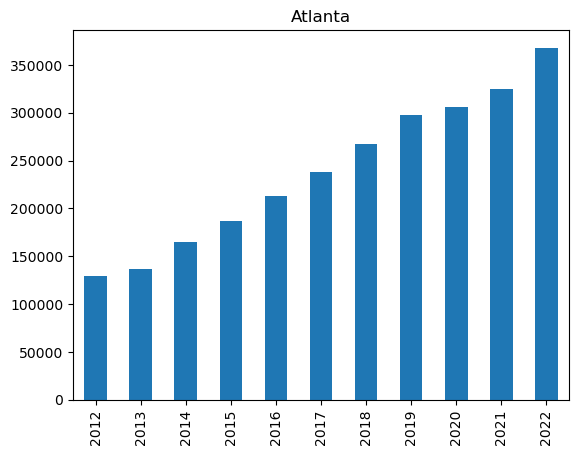

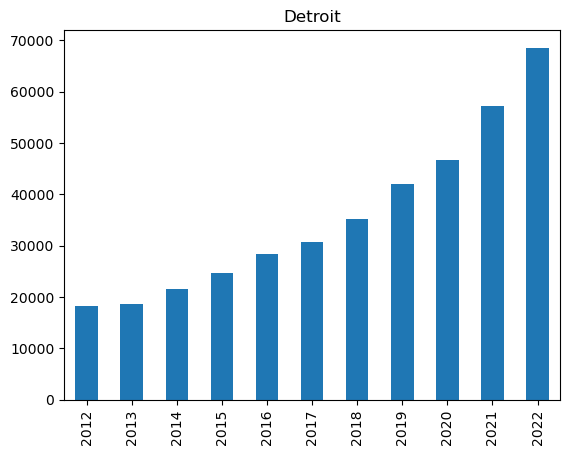

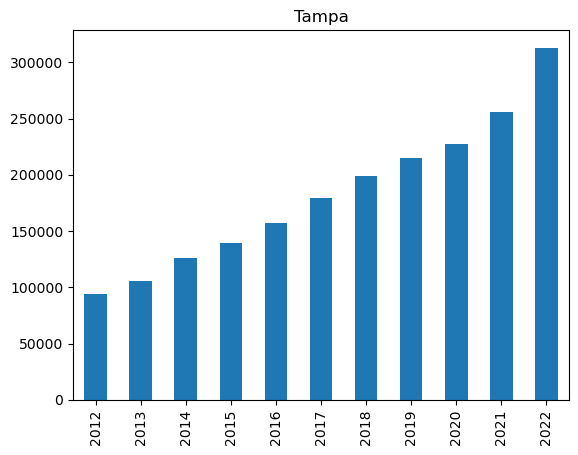

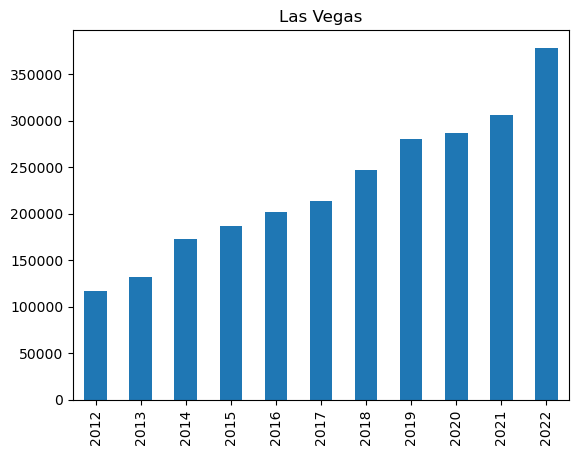

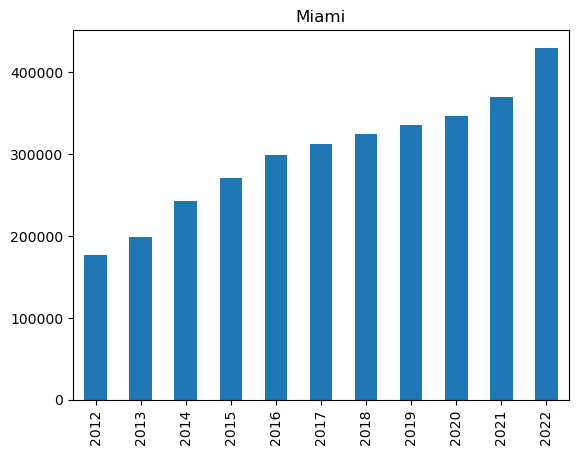

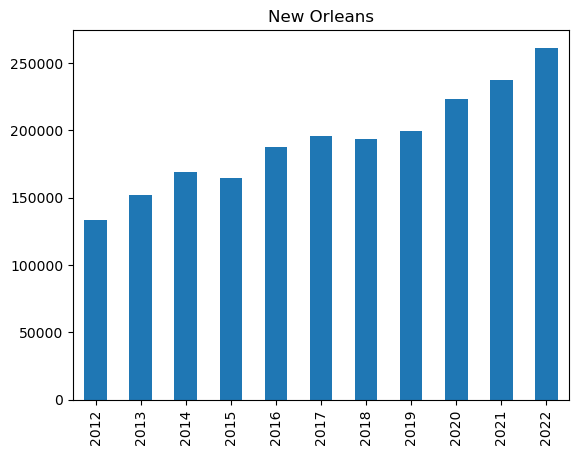

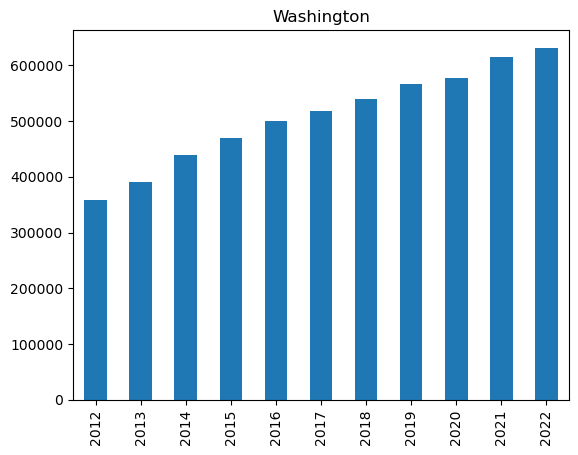

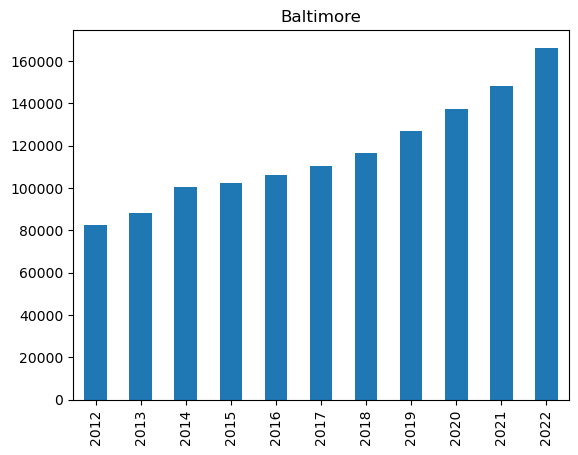

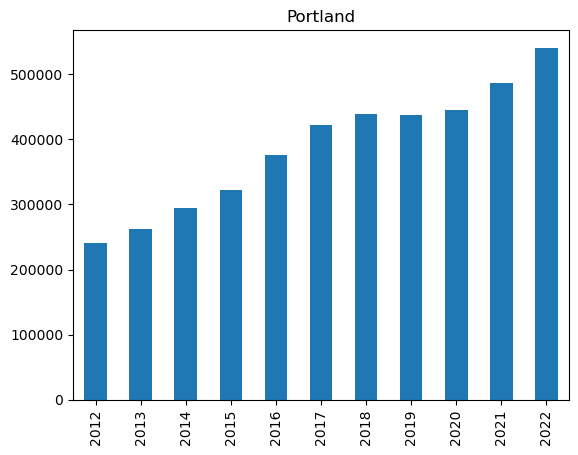

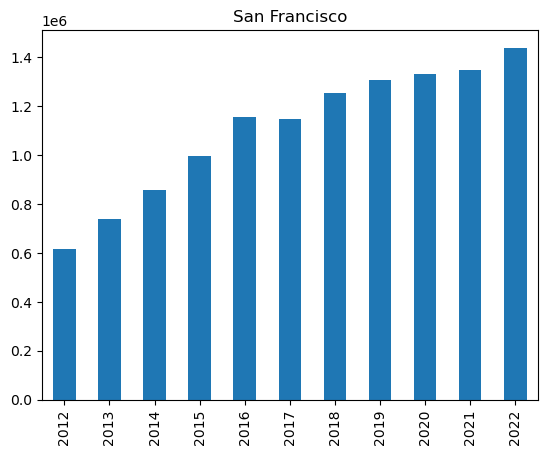

In [11]:
real_estate_prices_plot = pd.DataFrame(real_estate_prices)
real_estate_prices_plot = real_estate_prices_plot.iloc[:, :-1] # drops extra washington

# real_estate_prices_plot = 
for city in cities:
    current_city = real_estate_prices_plot[[city]].plot(kind="bar", title=city, legend=False)
    plt.show()

# df = pd.DataFrame(real_estate_prices)
# # Set the 'City' column as the index
# # Filter the DataFrame to include only the row corresponding to Miami
# miami_prices = df.loc['Miami']
# miami_prices = miami_prices.drop(columns=["StateName","Metro"], inplace=False)
# miami_prices.head()
# miami_prices_plot = pd.DataFrame(miami_prices)
# miami_prices_plot.plot()
# # Plot a bar graph for real estate prices in Miami
# miami_prices.plot(kind='bar', color='skyblue', figsize=(10, 6))
# # Add title and labels
# plt.title('Real Estate Prices in Miami (2012-2022)')
# plt.xlabel('Year')
# plt.ylabel('Price')
# # Show the plot
# plt.show()